# Model Development and Testing 
by, K. Thach

## Data Acquisition & Pre-processing

In [23]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import xml.etree.ElementTree as ET
import pandas as pd

In [24]:
# Define paths
DATASET_PATH = "datasets/oxford/images"  # Adjust if needed
SAVE_PATH = "datasets/processed"
ANNOTATIONS_PATH = "datasets/oxford/annotations/xmls"
CONVERTED_PATH = "datasets/converted_images"
# Ensure save directory exists
os.makedirs(SAVE_PATH, exist_ok=True)

# Image size for OV7675 compatibility
IMG_SIZE = (96, 96)

data_gen = ImageDataGenerator(
    rotation_range=30,  # Increase rotation range
    horizontal_flip=True,  
    zoom_range=0.2,  # Zoom in randomly
    shear_range=0.2,  # Distort images slightly
)


# Function to parse XML annotation files
def get_label_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    object_name = root.find("object").find("name").text.lower()
    return 1 if "dog" in object_name else 0  # Dog = 1, Not-Dog = 0


In [ ]:
CONVERTED_PATH = "datasets/converted_images"

# Ensure the new directory exists
os.makedirs(CONVERTED_PATH, exist_ok=True)

# Convert images to RGB JPEG format
for file in os.listdir(DATASET_PATH):
    if file.endswith((".jpg", ".png", ".jpeg")):
        img_path = os.path.join(DATASET_PATH, file)
        
        try:
            img = Image.open(img_path).convert("RGB")  # Convert to RGB
            save_path = os.path.join(CONVERTED_PATH, file.split(".")[0] + ".jpg")
            img.save(save_path, "JPEG")  # Save as standard JPEG
            print(f"✅ Converted: {file} → {save_path}")
        except Exception as e:
            print(f"⚠️ Failed to convert {file}: {e}")

print("✅ All images converted successfully!")

✅ Converted: Egyptian_Mau_167.jpg → datasets/converted_images/Egyptian_Mau_167.jpg
✅ Converted: pug_52.jpg → datasets/converted_images/pug_52.jpg
✅ Converted: basset_hound_112.jpg → datasets/converted_images/basset_hound_112.jpg
✅ Converted: Siamese_193.jpg → datasets/converted_images/Siamese_193.jpg
✅ Converted: shiba_inu_122.jpg → datasets/converted_images/shiba_inu_122.jpg
✅ Converted: Siamese_53.jpg → datasets/converted_images/Siamese_53.jpg
✅ Converted: Birman_167.jpg → datasets/converted_images/Birman_167.jpg
✅ Converted: leonberger_6.jpg → datasets/converted_images/leonberger_6.jpg
✅ Converted: Siamese_47.jpg → datasets/converted_images/Siamese_47.jpg
✅ Converted: shiba_inu_136.jpg → datasets/converted_images/shiba_inu_136.jpg
✅ Converted: saint_bernard_139.jpg → datasets/converted_images/saint_bernard_139.jpg
✅ Converted: Birman_173.jpg → datasets/converted_images/Birman_173.jpg
✅ Converted: Abyssinian_225.jpg → datasets/converted_images/Abyssinian_225.jpg
✅ Converted: basset_h

In [4]:
import os
import cv2

DATASET_PATH = "datasets/oxford/images"
CONVERTED_PATH = "datasets/converted_images"
# List files
image_files = [f for f in os.listdir(CONVERTED_PATH) if f.endswith(".jpg") or f.endswith(".png")]

print(f"Found {len(image_files)} images in the dataset.")

# Try loading an image
if image_files:
    test_img_path = os.path.join(CONVERTED_PATH, image_files[0])
    print(test_img_path)
    img = cv2.imread(test_img_path)
    if img is None:
        print("⚠️ OpenCV failed to load the test image.")
    else:
        print(f"✅ Successfully loaded {image_files[0]}, shape: {img.shape}")


Found 7390 images in the dataset.
datasets/converted_images/Egyptian_Mau_167.jpg
✅ Successfully loaded Egyptian_Mau_167.jpg, shape: (275, 183, 3)


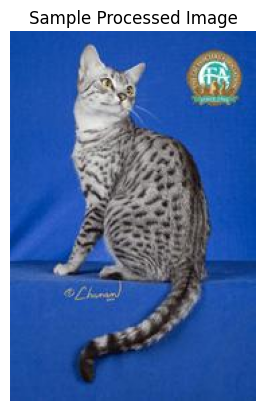

In [6]:
import cv2
import matplotlib.pyplot as plt

SAMPLE_IMAGE = os.path.join(CONVERTED_PATH, image_files[0])  # Replace with an actual image filename

img = cv2.imread(SAMPLE_IMAGE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from OpenCV format (BGR) to RGB

plt.imshow(img)
plt.title("Sample Processed Image")
plt.axis("off")
plt.show()


In [26]:
from PIL import Image

image_path = os.path.join(DATASET_PATH, image_files[0])
try:
    img = Image.open(image_path)
    img.show()  # Opens the image
    print(f"✅ Successfully loaded {image_files[0]} using PIL.")
except Exception as e:
    print(f"❌ PIL failed to load {image_files[0]}: {e}")

✅ Successfully loaded Egyptian_Mau_167.jpg using PIL.


In [27]:
img = Image.open(image_path).convert("RGB")
img.save("test_image.jpg")  # Save as standard JPEG

In [24]:
import os

ANNOTATIONS_PATH = "datasets/oxford/annotations/xmls"

xml_files = [f for f in os.listdir(ANNOTATIONS_PATH) if f.endswith(".xml")]
print(f"Found {len(xml_files)} annotation files.")

# Check if an XML file exists for a sample image
if xml_files:
    sample_xml = xml_files[0]
    print(f"✅ Found annotation: {sample_xml}")
else:
    print("⚠️ No XML annotation files found. Labels might not be assigned correctly.")


Found 3686 annotation files.
✅ Found annotation: British_Shorthair_10.xml


In [9]:
print(file)


shiba_inu_66.jpg


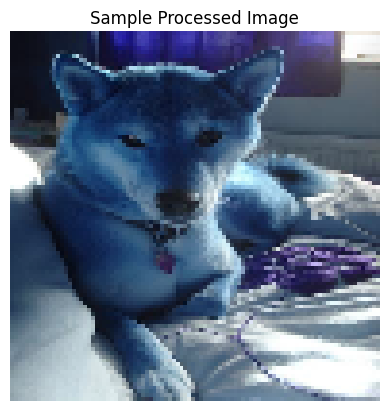

In [ ]:


img_path = os.path.join(CONVERTED_PATH, file)
img = cv2.imread(img_path)
img = cv2.resize(img, IMG_SIZE)  # Resize to 96x96
img = img / 255.0  # Normalize pixel values
plt.imshow(img)
plt.title("Sample Processed Image")
plt.axis("off")
plt.show()

In [9]:
# Load and preprocess images
LABELS_CSV = "datasets/processed_labels.csv"
labels = []

for file in os.listdir(CONVERTED_PATH):
    if file.endswith(".jpg") or file.endswith(".png"):
        # Read image
        img_path = os.path.join(CONVERTED_PATH, file)
        img = cv2.imread(img_path)

        # Check if image is loaded correctly
        if img is None:
            print(f"⚠️ Warning: Failed to load {file}. Skipping...")
            continue
        
        img = cv2.resize(img, IMG_SIZE)  # Resize to 96x96
        img = img / 255.0  # Normalize pixel values

        # Get label from corresponding XML annotation file
        xml_filename = os.path.splitext(file)[0] + ".xml"
        xml_path = os.path.join(ANNOTATIONS_PATH, xml_filename)
        if os.path.exists(xml_path):
            label = get_label_from_xml(xml_path)
        else:
            continue  # Skip if no annotation file found
        
    

        # Expand dimensions to match expected input shape for augmentation
        img = np.expand_dims(img, axis=0)  # Shape: (1, 96, 96, 3)

        # Create an iterator for generating augmented images
        aug_iter = data_gen.flow(img, batch_size=1)  

        # Generate 5 augmented images
        for i in range(5):  
            augmented_img = next(aug_iter)[0]  # Get the next augmented image from the iterator

            # Ensure image values are correctly scaled before saving
            augmented_img = (augmented_img * 255).clip(0, 255).astype(np.uint8)  # Convert to uint8
            augmented_img = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR)  # Convert to OpenCV BGR format

            # Save the augmented image
            aug_filename = f"aug_{i}_{file}"
            save_filename = os.path.join(SAVE_PATH, aug_filename)
            cv2.imwrite(save_filename, augmented_img)

            # Store augmented image label
            labels.append([aug_filename, label])

# Save labels to CSV
labels_df = pd.DataFrame(labels, columns=["filename", "label"])
labels_df.to_csv(LABELS_CSV, index=False)

print(f"✅ Preprocessing complete! Labels saved to {LABELS_CSV}")


✅ Preprocessing complete! Labels saved to datasets/processed_labels.csv


In [8]:
# Save labels to CSV
labels_df = pd.DataFrame(labels, columns=["filename", "label"])
labels_df.to_csv(LABELS_CSV, index=False)

In [25]:
# Paths for datasets
OXFORD_IMAGES_PATH = "datasets/converted_images"
OXFORD_ANNOTATIONS_PATH = "datasets/oxford/annotations/xmls"
DOG_CAT_IMAGES_PATH = "datasets/dog_and_cat_detection/images"
DOG_CAT_ANNOTATIONS_PATH = "datasets/dog_and_cat_detection/annotations"
SAVE_PATH = "datasets/processed"
LABELS_CSV = "datasets/processed_labels.csv"

# Ensure save directory exists
os.makedirs(SAVE_PATH, exist_ok=True)

# Image size for TinyML (OV7675 camera)
IMG_SIZE = (96, 96)

# Data augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True
)

# Function to parse XML annotation files (Oxford & Dog/Cat Dataset)
def get_label_from_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    object_name = root.find("object").find("name").text.lower()
    return 1 if "dog" in object_name else 0  # Dog = 1, Not-Dog = 0 (Includes cats)


In [26]:

def process_dataset(image_path, annotation_path):
    labels = []
    for file in os.listdir(image_path):
        if file.endswith((".jpg", ".png")):
            img_path = os.path.join(image_path, file)

            # Read and convert to grayscale
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            if img is None:
                print(f"⚠️ Warning: Failed to load {file}. Skipping...")
                continue

            img = cv2.resize(img, IMG_SIZE)
            img = img.astype(np.float32) / 255.0  # Normalize
            img = np.expand_dims(img, axis=-1)  # Add channel dimension (96,96,1)

            # Get label from annotation
            xml_filename = os.path.splitext(file)[0] + ".xml"
            xml_path = os.path.join(annotation_path, xml_filename)
            if os.path.exists(xml_path):
                label = get_label_from_xml(xml_path)
            else:
                continue  # Skip if no annotation file found

            # ✅ Save grayscale image
            save_filename = os.path.join(SAVE_PATH, file)
            cv2.imwrite(save_filename, (img * 255).astype(np.uint8))

            labels.append([file, label])  # Store label

            # ✅ Generate and save augmented images
            img = np.expand_dims(img, axis=0)
            aug_iter = data_gen.flow(img, batch_size=1)
            for i in range(5):  
                augmented_img = next(aug_iter)[0]
                aug_filename = f"aug_{i}_{file}"
                aug_save_path = os.path.join(SAVE_PATH, aug_filename)

                # Save augmented image in grayscale
                cv2.imwrite(aug_save_path, (augmented_img * 255).astype(np.uint8))

                # Store augmented labels
                labels.append([aug_filename, label])

    return labels

# Process both datasets
labels_oxford = process_dataset(OXFORD_IMAGES_PATH, OXFORD_ANNOTATIONS_PATH)
labels_dog_cat = process_dataset(DOG_CAT_IMAGES_PATH, DOG_CAT_ANNOTATIONS_PATH)

# Combine and save labels
all_labels = labels_oxford + labels_dog_cat
labels_df = pd.DataFrame(all_labels, columns=["filename", "label"])
labels_df.to_csv(LABELS_CSV, index=False)

print(f"✅ Preprocessing complete! Images saved as grayscale in {SAVE_PATH}")

✅ Preprocessing complete! Images saved as grayscale in datasets/processed
